# Pandas introduction

Import the pandas package, and set matplotlib inline.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
%matplotlib inline

In [43]:
from pandas import set_option
set_option("display.max_rows", 16)
LARGE_FIGSIZE = (12, 8)

Not that we're suspicous, but this notebook was created using pandas 0.16.2, in case of trouble, check this with the version number below.  Things have been know to break between 0.15.x and 0.16.x.

In [44]:
pd.__version__

'0.16.2'

## Importing data

Read a whitespace-separated file of data, set index to the first column, and parse it since those are dates.

In [45]:
filename = 'data/temperatures/annual.land_ocean.90S.90N.df_1901-2000mean.dat'
full_globe_temp = pd.read_table(filename, sep=r'\s+', names=['year', 'mean temp'],
                                index_col=0, parse_dates=True)
full_globe_temp

,mean temp
year,
1880-01-01,-0.1591
1881-01-01,-0.0789
1882-01-01,-0.1313
1883-01-01,-0.1675
1884-01-01,-0.2485
1885-01-01,-0.2042
1886-01-01,-0.1695
1887-01-01,-0.2505
...,...


Reading a somewhat more involved data file having a header and footer that should be skipped.

In [46]:
giss_temp = pd.read_table('data/temperatures/GLB.Ts+dSST.txt', sep='\s+',
                          skiprows=7, skip_footer=11, engine='python')
giss_temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1,1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
2,1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
3,1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
4,1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
5,1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
6,1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
7,1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2009,56,48,49,57,59,62,66,61,64,58,72,58,59,59,52,55,63,65,2009


In [47]:
co2 = pd.read_table('data/greenhouse_gaz/co2_mm_global.txt', sep='\s+',
                    parse_dates=[[0, 1]])
co2

,year_month,decimal,average,trend
0,1980-01-19,1980.042,338.45,337.82
1,1980-02-19,1980.125,339.17,338.12
2,1980-03-19,1980.208,339.49,338.14
3,1980-04-19,1980.292,339.87,338.25
4,1980-05-19,1980.375,340.30,338.78
5,1980-06-19,1980.458,339.86,339.08
6,1980-07-19,1980.542,338.32,339.17
7,1980-08-19,1980.625,337.11,339.37
...,...,...,...,...
416,2014-09-19,2014.708,394.90,397.61


In [48]:
northren_sea_level = pd.read_table('http://sealevel.colorado.edu/files/current/sl_nh.txt', sep='\s+')
northren_sea_level

,year,msl_ib(mm),#version_2015_rel3
0,1992.9323,13.717,NaN
1,1992.9595,1.328,NaN
2,1992.9866,-13.375,NaN
3,1993.0138,-24.723,NaN
4,1993.0409,-29.231,NaN
5,1993.0681,-32.538,NaN
6,1993.0952,-35.588,NaN
7,1993.1223,-26.579,NaN
...,...,...,...
817,2015.1666,34.251,NaN


In [49]:
southren_sea_level = pd.read_table('http://sealevel.colorado.edu/files/current/sl_sh.txt', sep='\s+')
southren_sea_level

,year,msl_ib(mm),#version_2015_rel3
0,1992.9323,2.517,NaN
1,1992.9595,-7.645,NaN
2,1992.9866,-2.267,NaN
3,1993.0138,0.855,NaN
4,1993.0409,-2.020,NaN
5,1993.0681,-0.398,NaN
6,1993.0952,4.102,NaN
7,1993.1223,6.787,NaN
...,...,...,...
817,2015.1666,85.865,NaN


In [50]:
global_sea_level = pd.read_table('http://sealevel.colorado.edu/files/2015_rel2/sl_ns_global.txt', sep='\s+')
global_sea_level

,year,msl_ib_ns(mm),#version_2015_rel2
0,1992.9595,-5.818,NaN
1,1992.9866,-7.525,NaN
2,1993.0138,-9.215,NaN
3,1993.0409,-11.796,NaN
4,1993.0681,-11.291,NaN
5,1993.0952,-9.569,NaN
6,1993.1223,-3.714,NaN
7,1993.1495,-2.471,NaN
...,...,...,...
772,2014.9494,70.723,NaN


Reading tables from the web is easy, it results in a list of all tables on a page.

In [51]:
table_list = pd.read_html('http://www.psmsl.org/data/obtaining/')
local_sea_level_stations = table_list[0]
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,26/11/2014,60,281
4,PAGO PAGO,539,-14.280,-170.690,144,ASM,28/04/2015,745,1
5,BAHIA ESPERANZA,988,-63.300,-56.917,185,ATA,11/05/1999,999,1
6,ARGENTINE ISLANDS,913,-65.246,-64.257,188,ATA,21/05/2015,999,3
7,PUERTO SOBERANIA,1603,-62.483,-59.633,189,ATA,30/09/2004,999,5
...,...,...,...,...,...,...,...,...,...
1414,DANANG,1475,16.100,108.217,NaN,VNM,28/10/2002,605,51


Data can also be read from Excel files (given that the necessary Python packages are installed).

In [52]:
sales = pd.read_excel('data/sales-funnel.xlsx')
sales

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
...,...,...,...,...,...,...,...,...
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


## Pandas data structures

Examening the type and features of a pandas dataframe.

In [53]:
type(giss_temp)

pandas.core.frame.DataFrame

In [54]:
print(giss_temp.shape)
print(giss_temp.dtypes)

(143, 20)
Year      object
Jan       object
Feb       object
Mar       object
Apr       object
May       object
Jun       object
Jul       object
           ...  
Dec       object
J-D       object
D-N       object
DJF       object
MAM       object
JJA       object
SON       object
Year.1    object
dtype: object


In [55]:
giss_temp.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 
            ...
            133, 134, 135, 136, 137, 138, 139, 140, 141, 142],
           dtype='int64', length=143)

In [56]:
giss_temp.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON',
       'Year.1'],
      dtype='object')

In [57]:
giss_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 20 columns):
Year      143 non-null object
Jan       143 non-null object
Feb       143 non-null object
Mar       143 non-null object
Apr       143 non-null object
May       143 non-null object
Jun       143 non-null object
Jul       143 non-null object
Aug       143 non-null object
Sep       143 non-null object
Oct       143 non-null object
Nov       143 non-null object
Dec       143 non-null object
J-D       143 non-null object
D-N       143 non-null object
DJF       143 non-null object
MAM       143 non-null object
JJA       143 non-null object
SON       143 non-null object
Year.1    143 non-null object
dtypes: object(20)
memory usage: 12.3+ KB


### Series

In [58]:
full_globe_temp.columns

Index(['mean temp'], dtype='object')

In [59]:
full_globe_temp = full_globe_temp['mean temp']

In [60]:
type(full_globe_temp)

pandas.core.series.Series

In [61]:
full_globe_temp.dtype

dtype('float64')

In [62]:
full_globe_temp.shape

(131,)

In [63]:
full_globe_temp.nbytes

1048

In [64]:
full_globe_temp.index

DatetimeIndex(['1880-01-01', '1881-01-01', '1882-01-01', '1883-01-01',
               '1884-01-01', '1885-01-01', '1886-01-01', '1887-01-01',
               '1888-01-01', '1889-01-01', 
               ...
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01'],
              dtype='datetime64[ns]', name='year', length=131, freq=None, tz=None)

In [65]:
full_globe_temp.values

array([ -1.59100000e-01,  -7.89000000e-02,  -1.31300000e-01,
        -1.67500000e-01,  -2.48500000e-01,  -2.04200000e-01,
        -1.69500000e-01,  -2.50500000e-01,  -1.60500000e-01,
        -1.10300000e-01,  -3.01400000e-01,  -2.52700000e-01,
        -2.92600000e-01,  -3.27400000e-01,  -2.88000000e-01,
        -2.14600000e-01,  -1.00900000e-01,  -1.29400000e-01,
        -2.51700000e-01,  -1.35600000e-01,  -1.12500000e-01,
        -1.69300000e-01,  -2.25500000e-01,  -3.44200000e-01,
        -3.79900000e-01,  -2.58300000e-01,  -2.06000000e-01,
        -3.72600000e-01,  -3.92200000e-01,  -4.04100000e-01,
        -3.86000000e-01,  -4.14400000e-01,  -3.42200000e-01,
        -3.19600000e-01,  -1.59900000e-01,  -8.10000000e-02,
        -2.80300000e-01,  -3.22700000e-01,  -2.10600000e-01,
        -2.18600000e-01,  -2.02500000e-01,  -1.39000000e-01,
        -2.22200000e-01,  -2.06300000e-01,  -1.84300000e-01,
        -1.26000000e-01,  -1.92000000e-02,  -1.00700000e-01,
        -9.35000000e-02,

### Creating dataframes

Combining two data sets into one pandas  dataframe. The original dataframes should be indexed similarly, and have the same size data.

In [66]:
np.all(southren_sea_level.year == northren_sea_level.year)

True

In [67]:
len(northren_sea_level) == len(southren_sea_level)

True

The year will be the index, and there are two columns of data.

In [68]:
mean_sea_level = pd.DataFrame({'northern_hem': northren_sea_level['msl_ib(mm)'].values,
                               'southren_hem': southren_sea_level['msl_ib(mm)'].values},
                               index=northren_sea_level.year)
mean_sea_level

,northern_hem,southren_hem
year,,
1992.9323,13.717,2.517
1992.9595,1.328,-7.645
1992.9866,-13.375,-2.267
1993.0138,-24.723,0.855
1993.0409,-29.231,-2.020
1993.0681,-32.538,-0.398
1993.0952,-35.588,4.102
1993.1223,-26.579,6.787
...,...,...


## Cleaning and formatting

### Renaming columns

Rename columns so that they don't have '.' characters in them.

In [69]:
local_sea_level_stations.columns = [name.strip().replace('.', '')
                                       for name in local_sea_level_stations.columns]
local_sea_level_stations

,Station Name,ID,Lat,Lon,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,26/11/2014,60,281
4,PAGO PAGO,539,-14.280,-170.690,144,ASM,28/04/2015,745,1
5,BAHIA ESPERANZA,988,-63.300,-56.917,185,ATA,11/05/1999,999,1
6,ARGENTINE ISLANDS,913,-65.246,-64.257,188,ATA,21/05/2015,999,3
7,PUERTO SOBERANIA,1603,-62.483,-59.633,189,ATA,30/09/2004,999,5
...,...,...,...,...,...,...,...,...,...
1414,DANANG,1475,16.100,108.217,NaN,VNM,28/10/2002,605,51


Rename the index.

In [70]:
mean_sea_level.index.name = 'date'

In [71]:
mean_sea_level

,northern_hem,southren_hem
date,,
1992.9323,13.717,2.517
1992.9595,1.328,-7.645
1992.9866,-13.375,-2.267
1993.0138,-24.723,0.855
1993.0409,-29.231,-2.020
1993.0681,-32.538,-0.398
1993.0952,-35.588,4.102
1993.1223,-26.579,6.787
...,...,...


### Setting NaNs

Missing values in `full_globe_temp` are represented by `-999.000`, but they should be set to NaNs in order to get good results.

In [72]:
missing_value_mask = (full_globe_temp == -999.000)

In [73]:
missing_value_mask.value_counts()

False    130
True       1
dtype: int64

In [74]:
full_globe_temp[missing_value_mask] = np.nan
full_globe_temp

year
1880-01-01   -0.1591
1881-01-01   -0.0789
1882-01-01   -0.1313
1883-01-01   -0.1675
1884-01-01   -0.2485
1885-01-01   -0.2042
1886-01-01   -0.1695
1887-01-01   -0.2505
               ...  
2003-01-01    0.5818
2004-01-01    0.5416
2005-01-01    0.6154
2006-01-01    0.5601
2007-01-01    0.5472
2008-01-01    0.4804
2009-01-01    0.5551
2010-01-01       NaN
Name: mean temp, dtype: float64

### Setting the index

Use the `Year` column as the index.

In [75]:
giss_temp = giss_temp.set_index('Year')
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
Year,,,,,,,,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21,-22,***,****,-23,-18,-18,1880
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18,-14,-14,-17,-3,-15,-23,1881
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37,-17,-16,-4,-15,-23,-20,1882
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21,-20,-21,-38,-18,-8,-22,1883
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25,-28,-28,-18,-33,-31,-28,1884
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0,-26,-28,-37,-30,-31,-15,1885
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18,-25,-24,-26,-26,-21,-21,1886
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40,-32,-30,-40,-29,-24,-28,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Dropping columns and rows

Drop the useless `Year.1` column.

In [76]:
giss_temp = giss_temp.drop('Year.1', axis=1)

Or, alternatively, keep only a subset of columns in the dataframe.

In [77]:
giss_temp = giss_temp[[u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun',
                       u'Jul', u'Aug', u'Sep', u'Oct', u'Nov', u'Dec']]
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40
...,...,...,...,...,...,...,...,...,...,...,...,...


In [78]:
giss_temp = giss_temp.drop('Year')

Missing values are indicated by `****`, replace by NaNs for proper handling.

In [79]:
giss_temp = giss_temp.where(giss_temp != '****', np.nan)
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40
...,...,...,...,...,...,...,...,...,...,...,...,...


### Adding a column

The `mean_sea_level` dataframe has data for the northren and southren hemisphere, and it would be useful to add the global values as well.

In [80]:
mean_sea_level

,northern_hem,southren_hem
date,,
1992.9323,13.717,2.517
1992.9595,1.328,-7.645
1992.9866,-13.375,-2.267
1993.0138,-24.723,0.855
1993.0409,-29.231,-2.020
1993.0681,-32.538,-0.398
1993.0952,-35.588,4.102
1993.1223,-26.579,6.787
...,...,...


In [81]:
global_sea_level = global_sea_level.set_index('year')
global_sea_level

,msl_ib_ns(mm),#version_2015_rel2
year,,
1992.9595,-5.818,NaN
1992.9866,-7.525,NaN
1993.0138,-9.215,NaN
1993.0409,-11.796,NaN
1993.0681,-11.291,NaN
1993.0952,-9.569,NaN
1993.1223,-3.714,NaN
1993.1495,-2.471,NaN
...,...,...


In [82]:
mean_sea_level['mean_global'] = global_sea_level['msl_ib_ns(mm)']
mean_sea_level

,northern_hem,southren_hem,mean_global
date,,,
1992.9323,13.717,2.517,NaN
1992.9595,1.328,-7.645,-5.818
1992.9866,-13.375,-2.267,-7.525
1993.0138,-24.723,0.855,-9.215
1993.0409,-29.231,-2.020,-11.796
1993.0681,-32.538,-0.398,-11.291
1993.0952,-35.588,4.102,-9.569
1993.1223,-26.579,6.787,-3.714
...,...,...,...


Note that NaNs are added for missing values, i.e., if the new column has no data for a particular index value.

Computations on columns can now be performed easily.

In [83]:
(mean_sea_level.northern_hem + mean_sea_level.southren_hem)/2.0 - global_sea_level['msl_ib_ns(mm)']

1992.9323       NaN
1992.9595    2.6595
1992.9866   -0.2960
1993.0138   -2.7190
1993.0409   -3.8295
1993.0681   -5.1770
1993.0952   -6.1740
1993.1223   -6.1820
              ...  
2015.1666       NaN
2015.1938       NaN
2015.2209       NaN
2015.2481       NaN
2015.2752       NaN
2015.3024       NaN
2015.3295       NaN
2015.3567       NaN
dtype: float64

### Changing dtypes

The `dtype` of the columns is in fact the generic `object`, while the values are floating point numbers.  This can be corrected easily using the `astype` method, replacing all values.

In [84]:
giss_temp.dtypes

Jan    object
Feb    object
Mar    object
Apr    object
May    object
Jun    object
Jul    object
Aug    object
Sep    object
Oct    object
Nov    object
Dec    object
dtype: object

In [85]:
for col in giss_temp.columns:
    giss_temp.loc[:, col] = giss_temp[col].astype(np.float32)
giss_temp.dtypes

Jan    float32
Feb    float32
Mar    float32
Apr    float32
May    float32
Jun    float32
Jul    float32
Aug    float32
Sep    float32
Oct    float32
Nov    float32
Dec    float32
dtype: object

Also the type of the index can be modified to a more sane integer type.

In [86]:
giss_temp.index.dtype

dtype('O')

In [87]:
giss_temp.index = giss_temp.index.astype(np.int32)

In [88]:
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25
1885,-57,-29,-19,-36,-35,-40,-28,-24,-17,-14,-14,0
1886,-37,-43,-34,-23,-21,-30,-13,-21,-12,-22,-29,-18
1887,-60,-43,-26,-34,-28,-25,-19,-28,-24,-33,-29,-40
...,...,...,...,...,...,...,...,...,...,...,...,...


## Visualization

Series can be plotted trivially as a function of their index.

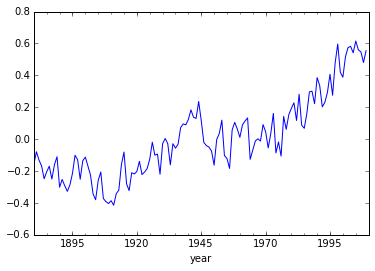

In [89]:
full_globe_temp.plot();

Also dataframes can be plotted, resulting in a line per columns, or in a plot per column when using `subplots`.

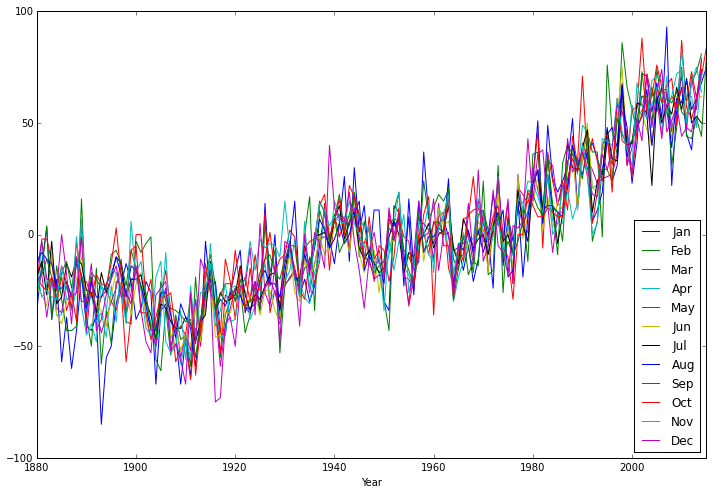

In [90]:
giss_temp.plot(figsize=LARGE_FIGSIZE);

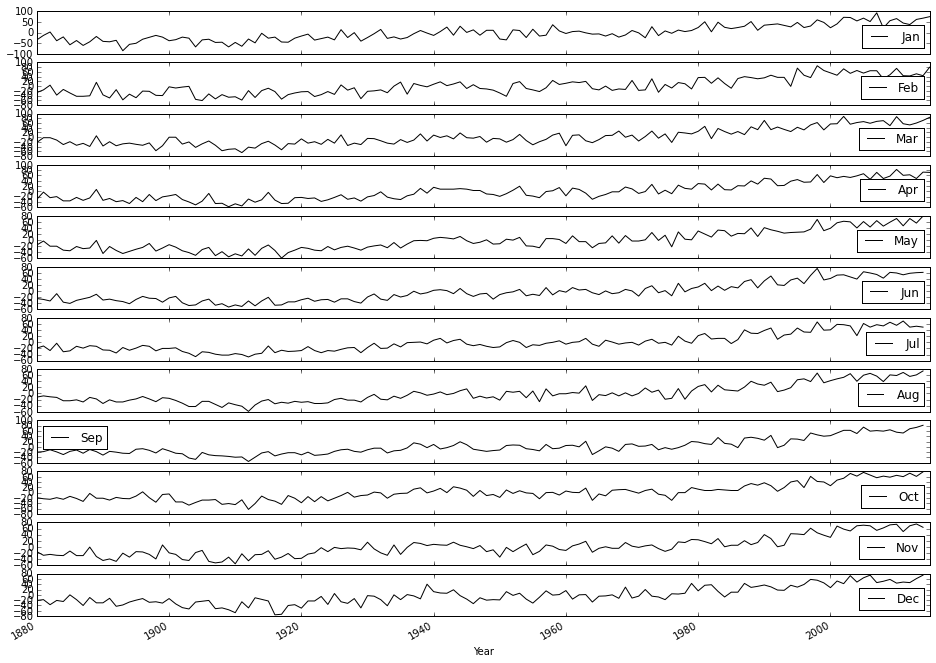

In [91]:
giss_temp.plot(subplots=True, figsize=(16, 12));

A useful plot type is a kernel distribution estimate, or `kde`.  Also a box plot is nice to get a feeling for the distribution of the values per month.

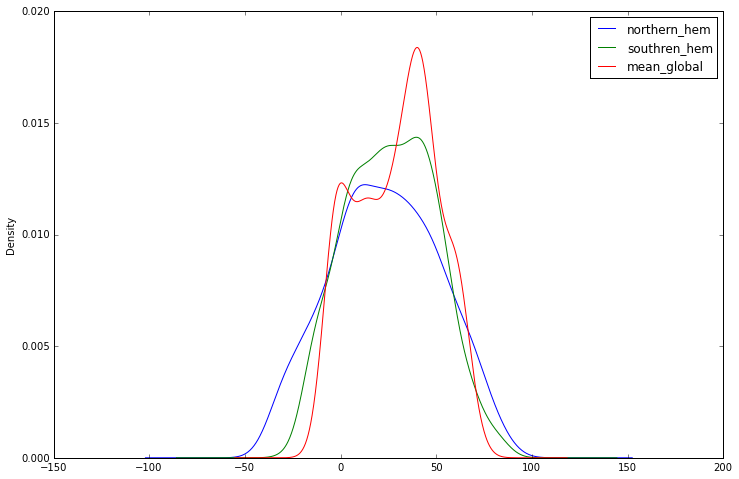

In [92]:
mean_sea_level.plot(kind='kde', figsize=(12, 8));

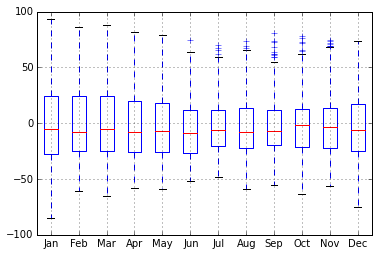

In [93]:
giss_temp.boxplot(return_type='dict');

A scatter matrix can be used to visualize the correlation between all columns of a pandas dataframe.

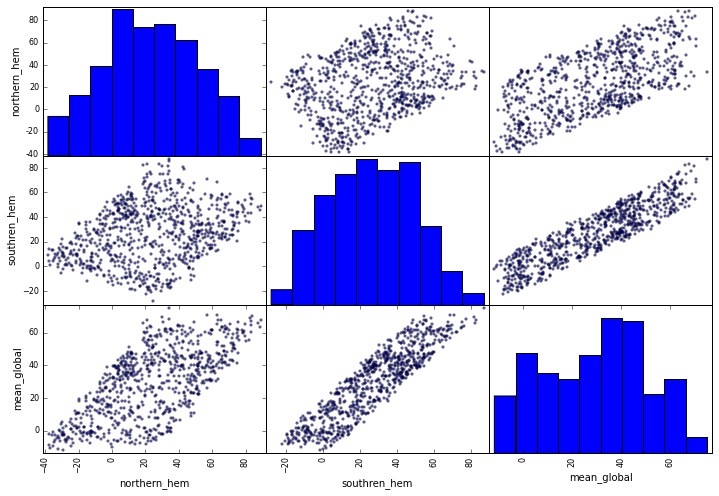

In [94]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(mean_sea_level, figsize=LARGE_FIGSIZE);

## Accessing data in pandas data structures

In [95]:
full_globe_temp

year
1880-01-01   -0.1591
1881-01-01   -0.0789
1882-01-01   -0.1313
1883-01-01   -0.1675
1884-01-01   -0.2485
1885-01-01   -0.2042
1886-01-01   -0.1695
1887-01-01   -0.2505
               ...  
2003-01-01    0.5818
2004-01-01    0.5416
2005-01-01    0.6154
2006-01-01    0.5601
2007-01-01    0.5472
2008-01-01    0.4804
2009-01-01    0.5551
2010-01-01       NaN
Name: mean temp, dtype: float64

In [96]:
my_date = pd.Timestamp('1885')
full_globe_temp[my_date]

-0.20419999999999999

Although it is possible to access data using the usual square bracket notation, it is more robust to use the `loc` object, or, for actual positions in dataframes, the `iloc` object part of pandas data structures.

In [97]:
full_globe_temp.loc[my_date]

-0.20419999999999999

In [98]:
full_globe_temp.iloc[0]

-0.15909999999999999

In [99]:
full_globe_temp.iloc[-1]

nan

In [100]:
full_globe_temp.index[-1]

Timestamp('2010-01-01 00:00:00')

Adding a row of data is possible as well.  NaN is used here since we don't have actual data.

In [101]:
full_globe_temp[pd.Timestamp('2011')] = np.nan

In [102]:
full_globe_temp.tail(5)

year
2007-01-01    0.5472
2008-01-01    0.4804
2009-01-01    0.5551
2010-01-01       NaN
2011-01-01       NaN
Name: mean temp, dtype: float64

Dataframes are accessed in a similar manner as series.

In [103]:
giss_temp['Jan']

Year
1880   -34
1881   -13
1882     3
1883   -38
1884   -20
1885   -57
1886   -37
1887   -60
        ..
2008    22
2009    56
2010    66
2011    45
2012    38
2013    62
2014    68
2015    75
Name: Jan, dtype: float32

In [104]:
giss_temp.loc[1979, 'Dec']

43.0

In [105]:
giss_temp.loc[1979, 'Jan':'Jun']

Jan    10
Feb   -12
Mar    14
Apr     8
May     1
Jun     9
Name: 1979, dtype: float32

## Ranges

Besides time stamps, it is also possible to use time period ranges as indices.  They can be constructed easily, as shown below for all months starting with January 1880, ending with December 2015.

In [106]:
giss_temp_index = pd.period_range('1/1/1880', '12/1/2015', freq='M')
giss_temp_index

PeriodIndex(['1880-01', '1880-02', '1880-03', '1880-04', '1880-05', '1880-06',
             '1880-07', '1880-08', '1880-09', '1880-10', 
             ...
             '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
             '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='int64', length=1632, freq='M')

## Transformations

The most general way to transform columns in a dataframe is through the `apply` method that takes a function as an argument, and will apply it to each value in that column.

In [107]:
local_sea_level_stations['Date'] = local_sea_level_stations['Date'].apply(pd.to_datetime)

However, commonly used functions are implemented directly as methods on columns.

In [108]:
local_sea_level_stations['Date'].min()

Timestamp('1980-01-01 00:00:00')

In [109]:
local_sea_level_stations['Date'].max()

Timestamp('2015-07-30 00:00:00')

The `giss_temp` dataframe is in fact a time series over all months from 1880 till 2015, so it can be transformed into a time series indexed by year, month using the `unstack` method.

In [110]:
giss_temp_series = giss_temp.transpose().unstack()
giss_temp_series

Year     
1880  Jan   -34
      Feb   -27
      Mar   -22
      Apr   -30
      May   -16
      Jun   -24
      Jul   -19
      Aug   -12
             ..
2015  May   NaN
      Jun   NaN
      Jul   NaN
      Aug   NaN
      Sep   NaN
      Oct   NaN
      Nov   NaN
      Dec   NaN
dtype: float32

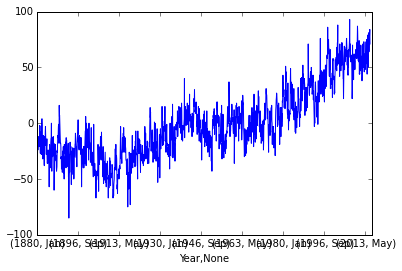

In [111]:
giss_temp_series.plot();

## Statistics

The `describe` method provides a statistical summary of the floating point data in a dataframe.

In [112]:
mean_sea_level.describe()

,northern_hem,southren_hem,mean_global
count,825.000000,825.000000,780.000000
mean,23.279635,26.433498,29.166036
std,28.335522,23.224709,21.226033
min,-38.377000,-28.239000,-11.796000
25%,3.306000,8.237000,11.130500
50%,23.058000,26.535000,31.783000
75%,44.728000,43.771000,45.047500
max,88.856000,86.893000,75.007000


To reduce noise in plots, rolling averages can be used, in this case over a window of 10 values.

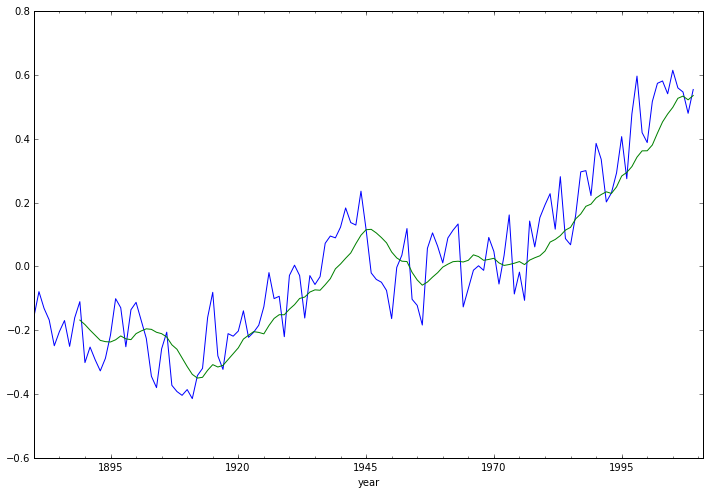

In [113]:
full_globe_temp.plot()
pd.rolling_mean(full_globe_temp, 10).plot(figsize=LARGE_FIGSIZE);

## Group by

The `mean_sea_level` dataframe contains several rows for the same year, if we want to group those values, some transformations need to be done first.  We restore the original index, so that `data` is an ordinary column again.  Next, it is transformed so that only the year remains, which is stored in a new column `year`.

In [114]:
mean_sea_level

,northern_hem,southren_hem,mean_global
date,,,
1992.9323,13.717,2.517,NaN
1992.9595,1.328,-7.645,-5.818
1992.9866,-13.375,-2.267,-7.525
1993.0138,-24.723,0.855,-9.215
1993.0409,-29.231,-2.020,-11.796
1993.0681,-32.538,-0.398,-11.291
1993.0952,-35.588,4.102,-9.569
1993.1223,-26.579,6.787,-3.714
...,...,...,...


In [115]:
mean_sea_level = mean_sea_level.reset_index()
mean_sea_level

,date,northern_hem,southren_hem,mean_global
0,1992.9323,13.717,2.517,NaN
1,1992.9595,1.328,-7.645,-5.818
2,1992.9866,-13.375,-2.267,-7.525
3,1993.0138,-24.723,0.855,-9.215
4,1993.0409,-29.231,-2.020,-11.796
5,1993.0681,-32.538,-0.398,-11.291
6,1993.0952,-35.588,4.102,-9.569
7,1993.1223,-26.579,6.787,-3.714
...,...,...,...,...
817,2015.1666,34.251,85.865,NaN


In [116]:
mean_sea_level['year'] = mean_sea_level['date'].apply(int)
mean_sea_level

,date,northern_hem,southren_hem,mean_global,year
0,1992.9323,13.717,2.517,NaN,1992
1,1992.9595,1.328,-7.645,-5.818,1992
2,1992.9866,-13.375,-2.267,-7.525,1992
3,1993.0138,-24.723,0.855,-9.215,1993
4,1993.0409,-29.231,-2.020,-11.796,1993
5,1993.0681,-32.538,-0.398,-11.291,1993
6,1993.0952,-35.588,4.102,-9.569,1993
7,1993.1223,-26.579,6.787,-3.714,1993
...,...,...,...,...,...
817,2015.1666,34.251,85.865,NaN,2015


The `groupby` method creates an object that one can iterate over, returning the group value, and a subdataframe for that group value.

In [117]:
grouped_sl = mean_sea_level.groupby('year')

In [119]:
for group, sub_df in grouped_sl:
    print(group)
    print(sub_df)
    print("")

1992
        date  northern_hem  southren_hem  mean_global  year
0  1992.9323        13.717         2.517          NaN  1992
1  1992.9595         1.328        -7.645       -5.818  1992
2  1992.9866       -13.375        -2.267       -7.525  1992

1993
         date  northern_hem  southren_hem  mean_global  year
3   1993.0138       -24.723         0.855       -9.215  1993
4   1993.0409       -29.231        -2.020      -11.796  1993
5   1993.0681       -32.538        -0.398      -11.291  1993
6   1993.0952       -35.588         4.102       -9.569  1993
7   1993.1223       -26.579         6.787       -3.714  1993
8   1993.1495       -29.622        10.315       -2.471  1993
9   1993.1766       -34.527         5.919       -6.784  1993
10  1993.2038       -34.250         7.193       -5.772  1993
..        ...           ...           ...          ...   ...
32  1993.8010        30.541       -14.024       -1.886  1993
33  1993.8282        18.240       -14.008          NaN  1993
34  1993.8553    

However, it also supports methods such as `mean` to compute aggregations over the values in the groups.

In [120]:
year_mean = grouped_sl.mean().drop('date', axis=1)
year_mean

,northern_hem,southren_hem,mean_global
year,,,
1992,0.556667,-2.465000,-6.671500
1993,-3.787108,-5.485378,-4.181882
1994,-4.631432,-3.523946,-3.668971
1995,-2.709314,-1.625171,-1.755452
1996,-1.184541,-0.204919,0.775912
1997,1.205108,8.180189,7.155545
1998,10.994865,4.420541,10.108182
1999,10.244595,8.327162,12.321727
...,...,...,...


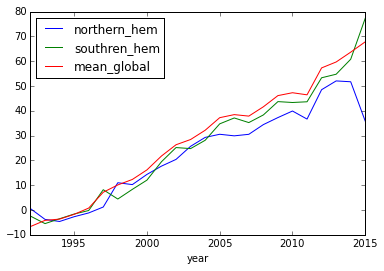

In [121]:
year_mean.plot();

## Pivot tables

A nice way to explore data and perform analysis is thruogh pivot tables, an operation supported directly on pandas dataframes.

In [122]:
set_option("display.max_rows", 20)
sales

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


The `Status` column is in fact categorical data, so we could transfrom that column using the `astype` method,
```
sales['Status'] = sales['Status'].astype('category')
```
We can set the order of the categorical values to suite our needs.  This will determine the sort order on this column.
```
sales['Status'].cat.set_categories(['won', 'presented', 'pending', 'declined'], inplace=True)
```
However, this brakes things badly later on, so we'll only do that once the bugs have been exterminated.

We want to know the sales by product and status, and are interested in the total price and quantity.

In [123]:
sales.pivot_table(index='Product', values=['Price', 'Quantity'], columns=['Status'], aggfunc=np.sum)

Price                           Quantity                      
Status      declined pending presented     won declined pending presented won
Product                                                                      
CPU           135000   40000     60000  230000        4       2         2   9
Maintenance      NaN   15000       NaN    7000      NaN       5       NaN   3
Monitor          NaN     NaN      5000     NaN      NaN     NaN         2 NaN
Software         NaN     NaN     30000     NaN      NaN     NaN         3 NaN

Of course, this yields some NaNs where no data is available, e.g., `Maintenance` has no `presented` or `declined` entries.  However, it would be more semantically correct to replace the NaNs by 0, since that is the actual intent.

In [124]:
sales.pivot_table(index='Product', values=['Price', 'Quantity'], columns=['Status'],
                  aggfunc=np.sum, fill_value=0)

Price                           Quantity                      
Status      declined pending presented     won declined pending presented won
Product                                                                      
CPU           135000   40000     60000  230000        4       2         2   9
Maintenance        0   15000         0    7000        0       5         0   3
Monitor            0       0      5000       0        0       0         2   0
Software           0       0     30000       0        0       0         3   0

Compute the average sales price per product status.

In [125]:
table = sales.pivot_table(index=['Product', 'Status'], values=['Price', 'Quantity'],
                          fill_value=0, aggfunc={'Price': [np.mean, len], 'Quantity': np.sum})
table

Quantity Price       
                           sum   len   mean
Product     Status                         
CPU         declined         4     3  45000
            pending          2     1  40000
            presented        2     2  30000
            won              9     3  76666
Maintenance pending          5     3   5000
            won              3     1   7000
Monitor     presented        2     1   5000
Software    presented        3     3  10000

Now we can query the table to get only the data for the status `won`.

In [126]:
table.query("Status == ['won']")

Quantity Price       
                        sum   len   mean
Product     Status                      
CPU         won           9     3  76666
Maintenance won           3     1   7000

The `table` object is just a pandas dataframe, so individual values can be obtained in the usual way.

In [127]:
table.loc['CPU', 'pending']['Price', 'mean']

40000